<a href="https://colab.research.google.com/github/NacliNaclo/EDOS/blob/main/Perceptron_and_Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries

In [ ]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [ ]:
# Import tensorflow
# set of library that we need to import to run tensorflow properly
import tensorflow as tf # import as shortcut
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl # keras manages the layers
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.13.0


In [ ]:
# Import other libraries
import matplotlib.pyplot as plt

### Define the Perceptron model

perceptron tries to act a neuoron
linear function compute the weighted sum
non linear function generates the outptut

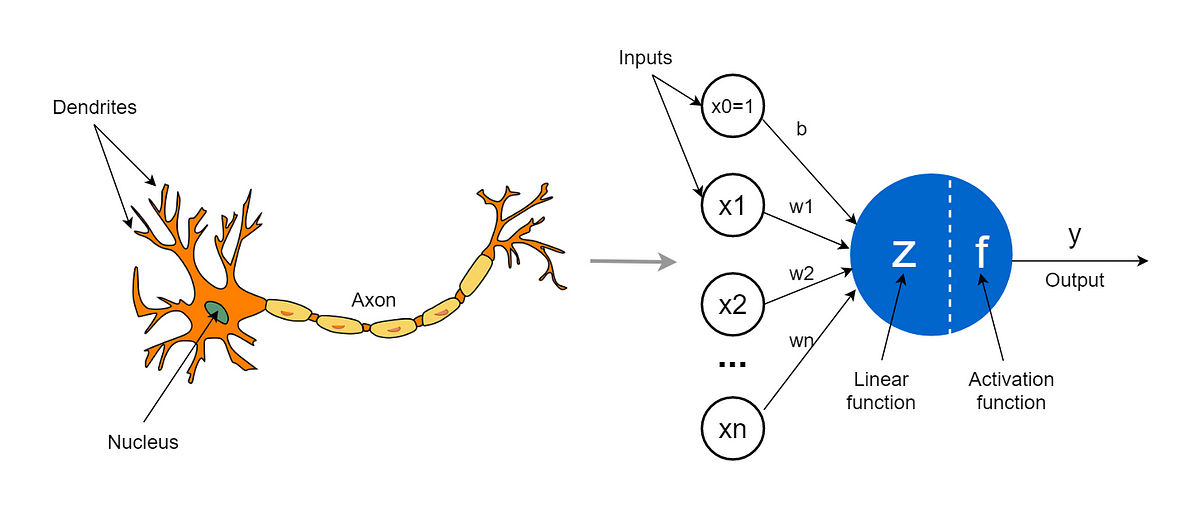

the inputs are not the # samples in our dataset, but the # features each sampled is described with

In [ ]:
def build_perceptron( #it's function that retuns a model that can be used after
    input_shape, #these are the arguments we need to give to the fucntion build_perceptron
    seed=seed
):
    # Fix randomness
    tf.random.set_seed(seed)

    # Build the model
    input_layer = tfkl.Input(shape=input_shape, name='Input') #input layer first layer (shape -> number of inputs and assign a name to this layer) (the number of input is given in input to the fucntion)

    output_layer = tfkl.Dense(units=1, name='Output')(input_layer) # dense layer is a fully connected layer, (all the neuron in inputs with the neurons in output)
    # this layer represents the true perceptron (single layer); it's the output layer (but it's the only neuoron there is in our network)
    # in order to creare this layer, we need to specify the number of neuorons in this layer + wiht how many neuorns we want to establish connections. In this case we want to create a fully connect layer to same number of neurons as input.

    output_activation = tfkl.Activation('sigmoid', name='Sigmoid')(output_layer) #now we need to add an activation layer (every neruon has an activation function in order to generate the output)

    # we can see that the input,hidden(in this case is missing), output and activation are concatenated between each other (input -> hidden -> output -> activation).

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_activation, name='Perceptron') #to connecte all the parts we have created before

    # Compile the model
    loss = tfk.losses.BinaryCrossentropy() #we want to find the weights value through a optimization problem (in this case we use the binary cross entropy)
    learning_rate = 0.5
    optimizer = tfk.optimizers.SGD(learning_rate) #we want to optimize the loss8we have define above) with the stocastic gradient descent. it's called stocastic because we will work wi th batches (group of sample, not working with single sample)
    metrics = ['Accuracy'] #we use the accuracy since we are not able to read the binary cross entropy. So we are converting the binary cross entropy in accuracy so we are able to see if the model is learning
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Return the model
    return model

**Dense Layer**

The Dense Layer, also known as Fully Connected Layer, implements the operation:

*output = activation(dot(input, kernel) + bias)*

where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).
```

tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
```
**Activation Layer**

The Activation Layer applies an activation function to an output.
```
tf.keras.layers.Activation(
    activation, **kwargs
)
```
It is possible to combine the two layers in a more compact form.
```
# Build the model
input_layer = tfkl.Input(shape=input_shape, name='Input')
output_layer = tfkl.Dense(units=1, activation='sigmoid', name='Output')(input_layer)
# Connect input and output through the Model class
model = tfk.Model(inputs=input_layer, outputs=output_layer, name='Perceptron')
```




### AND Problem

now we can use the perceptron we have created

In [ ]:
X = np.array([ #it's our dataset, it's written in a matrix form
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
input_shape = X.shape[1:]
print('Dataset\n', X)
print('Dataset shape\n', X.shape)

y = np.array([[0],[0],[0],[1]]) #we want to build a AND port
print('\nLabels\n', y)
print('Labels shape\n', y.shape)

Dataset
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Dataset shape
 (4, 2)

Labels
 [[0]
 [0]
 [0]
 [1]]
Labels shape
 (4, 1)


Model: "Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 2)]               0         
                                                                 
 Output (Dense)              (None, 1)                 3         
                                                                 
 Sigmoid (Activation)        (None, 1)                 0         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


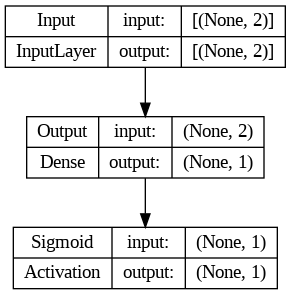

In [ ]:
perceptron = build_perceptron(input_shape) #we pass the input_shape (not the real inputs) to our model that we have created before
perceptron.summary() #summary is useful to plot the summary of model (also the number of parameters)
tfk.utils.plot_model(perceptron, show_shapes=True, expand_nested=True)
# 2 weights + bias (= 3)

In [ ]:
batch_size = 4  #the best batch size is between (30-500)
epochs = 250 # repeat the dataset 250 times (see the data for epochs time)

in order to train our model, we use the function fit, called witht the mode we have created -> percetron.fit

And we need to pass the inputs and the target output, batch sieze and epochs

In [ ]:
history = perceptron.fit(
    x = X,
    y = y,
    batch_size = batch_size,
    epochs = epochs
).history
#all the outputs are correct classified

Epoch 1/250
1/1 [==============================] - 1s 568ms/step - loss: 0.7965 - Accuracy: 0.7500
Epoch 2/250
1/1 [==============================] - 0s 11ms/step - loss: 0.7131 - Accuracy: 0.7500
Epoch 3/250
1/1 [==============================] - 0s 13ms/step - loss: 0.6522 - Accuracy: 0.7500
Epoch 4/250
1/1 [==============================] - 0s 18ms/step - loss: 0.6078 - Accuracy: 0.7500
Epoch 5/250
1/1 [==============================] - 0s 12ms/step - loss: 0.5753 - Accuracy: 0.7500
Epoch 6/250
1/1 [==============================] - 0s 20ms/step - loss: 0.5509 - Accuracy: 0.7500
Epoch 7/250
1/1 [==============================] - 0s 11ms/step - loss: 0.5320 - Accuracy: 0.7500
Epoch 8/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5168 - Accuracy: 0.7500
Epoch 9/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5042 - Accuracy: 0.7500
Epoch 10/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4934 - Accuracy: 0.7500
Epoch 11/250
1/1 [==

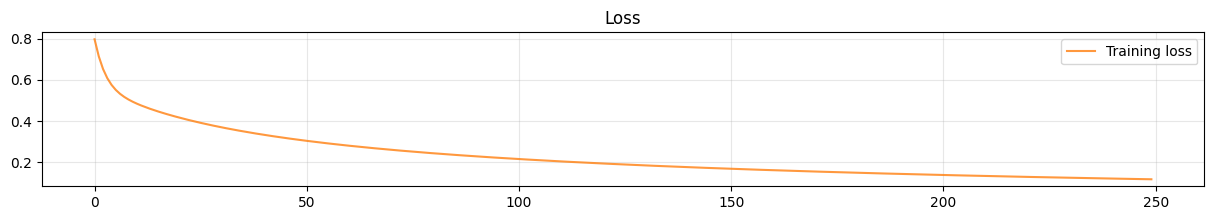

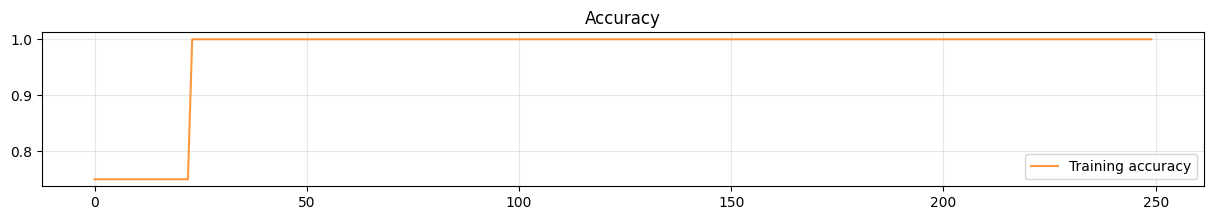

In [ ]:
plt.figure(figsize=(15,2))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

plt.figure(figsize=(15,2))
plt.plot(history['Accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

#when the accuracy reaches 0 why the loss descreses

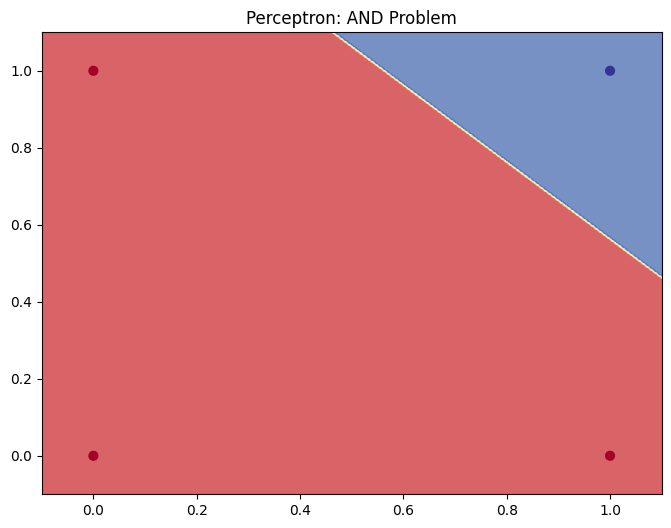

In [ ]:
xx, yy = np.meshgrid( #testing the model for some points in the space
    np.linspace(-0.1,1.1,100),
    np.linspace(-0.1,1.1,100)
)
x_in = np.c_[xx.ravel(), yy.ravel()]
y_pred = perceptron.predict(x_in, verbose=0)
y_pred = np.round(y_pred).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.title('Perceptron: AND Problem')
plt.show()

#so if we reduce the number of epoch, since the model is able to correct classify the output after 30, but if we try we can see that the loss is wrost, since the decision boundary is not in the middle (totry)

### OR Problem

In [ ]:
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
input_shape = X.shape[1:]
print('Dataset\n', X)
print('Dataset shape\n', X.shape)

y = np.array([[0],[1],[1],[1]])
print('\nLabels\n', y)
print('Labels shape\n', y.shape)

Dataset
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Dataset shape
 (4, 2)

Labels
 [[0]
 [1]
 [1]
 [1]]
Labels shape
 (4, 1)


Model: "Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 2)]               0         
                                                                 
 Output (Dense)              (None, 1)                 3         
                                                                 
 Sigmoid (Activation)        (None, 1)                 0         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


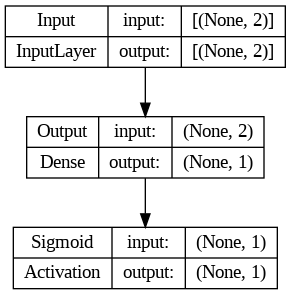

In [ ]:
perceptron = build_perceptron(input_shape)
perceptron.summary()
tfk.utils.plot_model(perceptron, show_shapes=True, expand_nested=True)

In [ ]:
history = perceptron.fit(
    x = X,
    y = y,
    batch_size = batch_size,
    epochs = epochs
).history

Epoch 1/250
1/1 [==============================] - 0s 343ms/step - loss: 0.5202 - Accuracy: 0.7500
Epoch 2/250
1/1 [==============================] - 0s 11ms/step - loss: 0.4827 - Accuracy: 0.7500
Epoch 3/250
1/1 [==============================] - 0s 11ms/step - loss: 0.4551 - Accuracy: 0.7500
Epoch 4/250
1/1 [==============================] - 0s 11ms/step - loss: 0.4342 - Accuracy: 0.7500
Epoch 5/250
1/1 [==============================] - 0s 10ms/step - loss: 0.4177 - Accuracy: 0.7500
Epoch 6/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4042 - Accuracy: 0.7500
Epoch 7/250
1/1 [==============================] - 0s 10ms/step - loss: 0.3930 - Accuracy: 0.7500
Epoch 8/250
1/1 [==============================] - 0s 9ms/step - loss: 0.3833 - Accuracy: 0.7500
Epoch 9/250
1/1 [==============================] - 0s 10ms/step - loss: 0.3748 - Accuracy: 0.7500
Epoch 10/250
1/1 [==============================] - 0s 9ms/step - loss: 0.3672 - Accuracy: 0.7500
Epoch 11/250
1/1 [===

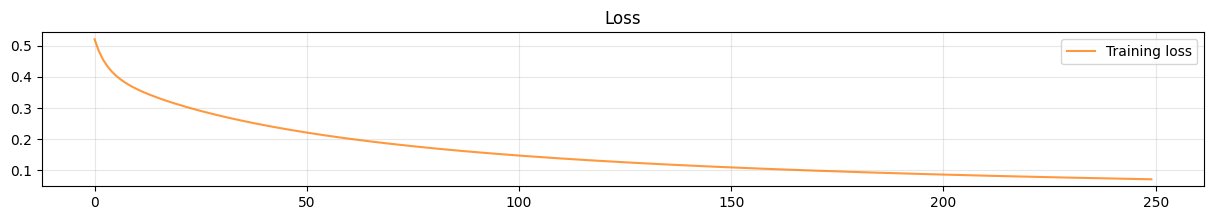

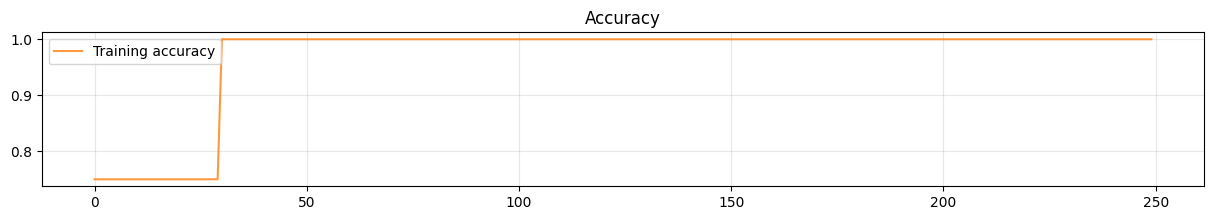

In [ ]:
plt.figure(figsize=(15,2))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

plt.figure(figsize=(15,2))
plt.plot(history['Accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

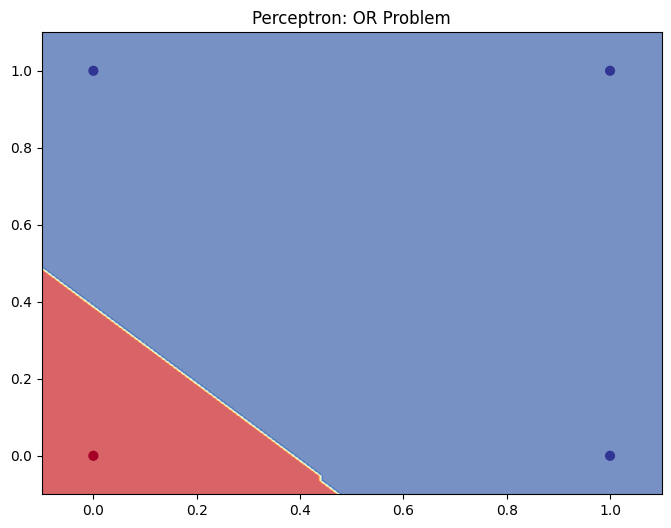

In [ ]:
xx, yy = np.meshgrid(
    np.linspace(-0.1,1.1,100),
    np.linspace(-0.1,1.1,100)
)
x_in = np.c_[xx.ravel(), yy.ravel()]
y_pred = perceptron.predict(x_in, verbose=0)
y_pred = np.round(y_pred).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.title('Perceptron: OR Problem')
plt.show()

### XOR Problem

In [ ]:
X = np.array([ #if they are different, the output is 1
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
input_shape = X.shape[1:]
print('Dataset\n', X)
print('Dataset shape\n', X.shape)

y = np.array([[0],[1],[1],[0]])
print('\nLabels\n', y)
print('Labels shape\n', y.shape)

Dataset
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Dataset shape
 (4, 2)

Labels
 [[0]
 [1]
 [1]
 [0]]
Labels shape
 (4, 1)


Model: "Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 2)]               0         
                                                                 
 Output (Dense)              (None, 1)                 3         
                                                                 
 Sigmoid (Activation)        (None, 1)                 0         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


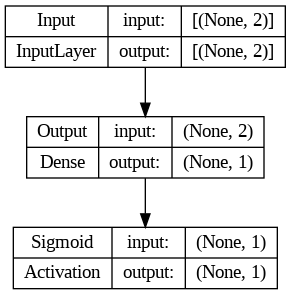

In [ ]:
perceptron = build_perceptron(input_shape)
perceptron.summary()
tfk.utils.plot_model(perceptron, show_shapes=True, expand_nested=True)

In [ ]:
history = perceptron.fit(
    x = X,
    y = y,
    batch_size = batch_size,
    epochs = epochs
).history

Epoch 1/250
1/1 [==============================] - 0s 316ms/step - loss: 0.7700 - Accuracy: 0.7500
Epoch 2/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7490 - Accuracy: 0.7500
Epoch 3/250
1/1 [==============================] - 0s 14ms/step - loss: 0.7342 - Accuracy: 0.7500
Epoch 4/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7240 - Accuracy: 0.7500
Epoch 5/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7170 - Accuracy: 0.7500
Epoch 6/250
1/1 [==============================] - 0s 12ms/step - loss: 0.7122 - Accuracy: 0.5000
Epoch 7/250
1/1 [==============================] - 0s 11ms/step - loss: 0.7088 - Accuracy: 0.5000
Epoch 8/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7065 - Accuracy: 0.5000
Epoch 9/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7048 - Accuracy: 0.5000
Epoch 10/250
1/1 [==============================] - 0s 17ms/step - loss: 0.7036 - Accuracy: 0.5000
Epoch 11/250
1/1 [=

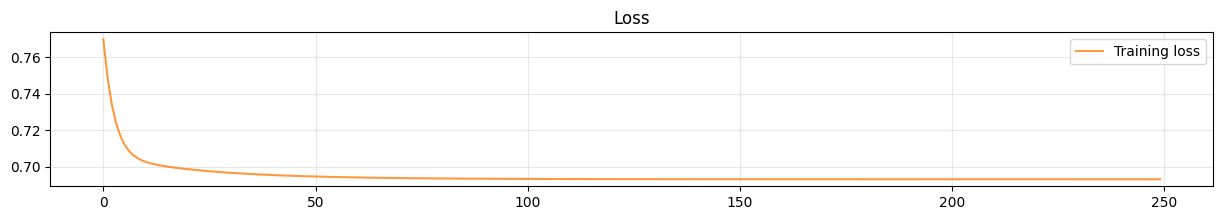

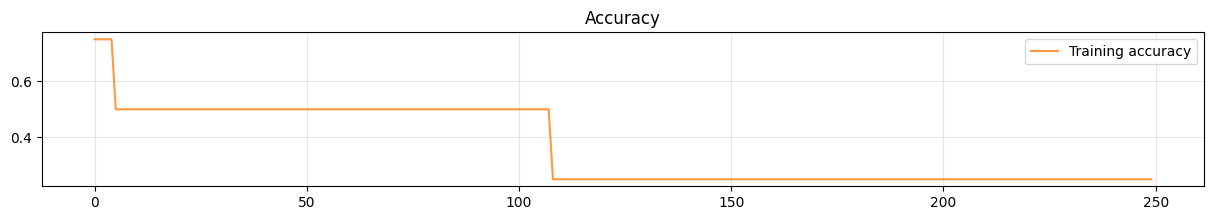

In [ ]:
plt.figure(figsize=(15,2))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

plt.figure(figsize=(15,2))
plt.plot(history['Accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

# there is no plane that divides the points

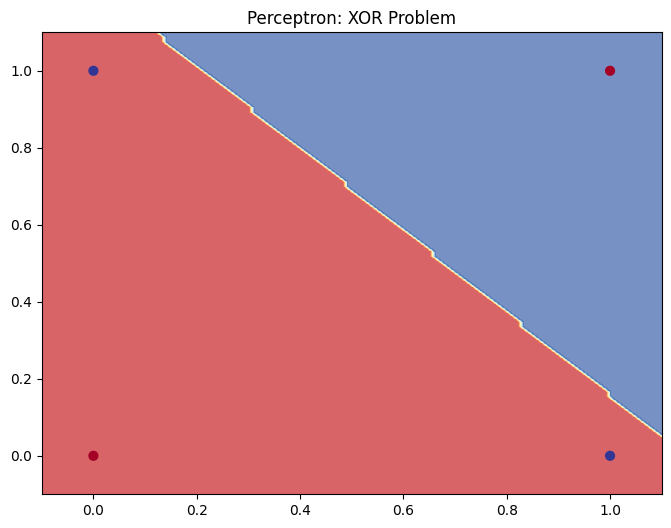

In [ ]:
xx, yy = np.meshgrid(
    np.linspace(-0.1,1.1,100),
    np.linspace(-0.1,1.1,100)
)
x_in = np.c_[xx.ravel(), yy.ravel()]
y_pred = perceptron.predict(x_in, verbose=0)
y_pred = np.round(y_pred).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.title('Perceptron: XOR Problem')
plt.show()

### Define the Multilayer Perceptron model

In [ ]:
def build_mlp( #we need a multilayer perceptron (adding a hiddne layer)
    input_shape,
    seed=seed
):
    # Fix randomness
    tf.random.set_seed(seed)

    # Build the model

  #sequential things, each layer depends on the previous one
    input_layer = tfkl.Input(shape=input_shape, name='Input') #input

    hidden_layer = tfkl.Dense(units=4, name='Hidden')(input_layer) #hidden layer
    hidden_activation = tfkl.Activation('relu', name='ReLU')(hidden_layer)

    output_layer = tfkl.Dense(units=1, name='Output')(hidden_activation) #output(output is a function of the hidden layer and not from the input layer as before)
    output_activation = tfkl.Activation('sigmoid', name='Sigmoid')(output_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_activation, name='MLP')

    # Compile the model
    loss = tfk.losses.BinaryCrossentropy()
    learning_rate = 0.5
    optimizer = tfk.optimizers.SGD(learning_rate)
    metrics = ['Accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Return the model
    return model

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 2)]               0         
                                                                 
 Hidden (Dense)              (None, 4)                 12        
                                                                 
 ReLU (Activation)           (None, 4)                 0         
                                                                 
 Output (Dense)              (None, 1)                 5         
                                                                 
 Sigmoid (Activation)        (None, 1)                 0         
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


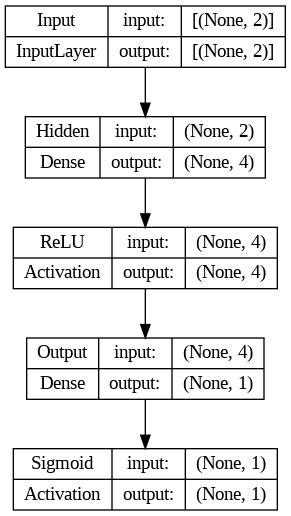

In [ ]:
mlp = build_mlp(input_shape)
mlp.summary()
tfk.utils.plot_model(mlp, show_shapes=True, expand_nested=True)
# there is a total of 12 parameters

In [ ]:
history = mlp.fit(
    x = X,
    y = y,
    batch_size = batch_size,
    epochs = epochs
).history

Epoch 1/250
1/1 [==============================] - 0s 422ms/step - loss: 0.8065 - Accuracy: 0.7500
Epoch 2/250
1/1 [==============================] - 0s 14ms/step - loss: 0.7135 - Accuracy: 0.7500
Epoch 3/250
1/1 [==============================] - 0s 11ms/step - loss: 0.6816 - Accuracy: 0.7500
Epoch 4/250
1/1 [==============================] - 0s 15ms/step - loss: 0.6580 - Accuracy: 0.7500
Epoch 5/250
1/1 [==============================] - 0s 11ms/step - loss: 0.6400 - Accuracy: 0.7500
Epoch 6/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6281 - Accuracy: 0.7500
Epoch 7/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6262 - Accuracy: 0.5000
Epoch 8/250
1/1 [==============================] - 0s 11ms/step - loss: 0.6134 - Accuracy: 0.5000
Epoch 9/250
1/1 [==============================] - 0s 12ms/step - loss: 0.6051 - Accuracy: 0.7500
Epoch 10/250
1/1 [==============================] - 0s 11ms/step - loss: 0.5996 - Accuracy: 0.7500
Epoch 11/250
1/1 [=

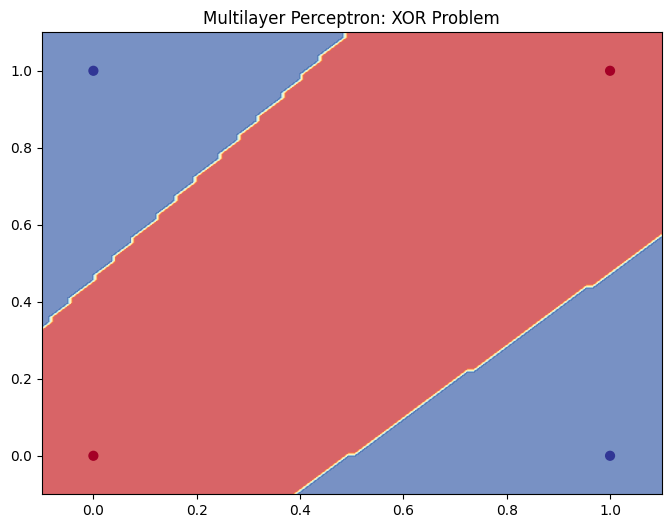

In [ ]:
xx, yy = np.meshgrid(
    np.linspace(-0.1,1.1,100),
    np.linspace(-0.1,1.1,100)
)
x_in = np.c_[xx.ravel(), yy.ravel()]
y_pred = mlp.predict(x_in, verbose=0)
y_pred = np.round(y_pred).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.title('Multilayer Perceptron: XOR Problem')
plt.show()

*Credits: Eugenio Lomurno, 📧 eugenio.lomurno@polimi.it*